In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-50k-movie-reviews-test-your-bert/train.csv
/kaggle/input/imdb-50k-movie-reviews-test-your-bert/test.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

2024-07-14 12:58:57.052523: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 12:58:57.052674: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 12:58:57.223949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_dir = '/kaggle/input/imdb-50k-movie-reviews-test-your-bert/train.csv'
test_dir = '/kaggle/input/imdb-50k-movie-reviews-test-your-bert/test.csv'

In [4]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
train_df.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [5]:
le = LabelEncoder()
train_df['sentiment_enc'] = le.fit_transform(train_df['sentiment'])
X = train_df['text']
y = to_categorical(train_df['sentiment_enc'])

In [6]:
print(X)

0        Now, I won't deny that when I purchased this o...
1        The saddest thing about this "tribute" is that...
2        Last night I decided to watch the prequel or s...
3        I have to admit that i liked the first half of...
4        I was not impressed about this film especially...
                               ...                        
24995    This film is fun, if your a person who likes a...
24996    After seeing this film I feel like I know just...
24997    first this deserves about 5 stars due to actin...
24998    If you like films that ramble with little plot...
24999    As interesting as a sheet of cardboard, this d...
Name: text, Length: 25000, dtype: object


In [7]:
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
def plot_model_learning(history, title):
    fig, ax = plt.subplots(2, 1, figsize=(20, 8))
    df = pd.DataFrame(history.history)
    df[['accuracy', 'val_accuracy']].plot(ax=ax[0])
    df[['loss', 'val_loss']].plot(ax=ax[1])
    ax[0].set_title('Model Accuracy', fontsize=12)
    ax[1].set_title('Model Loss', fontsize=12)
    fig.suptitle(f'{title}: Model Metrics', fontsize=18)

In [9]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

max_words = 10000
max_sequence_length = 200
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pd = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pd = pad_sequences(X_test_seq, maxlen=max_sequence_length)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.7201 - loss: 0.5309 - val_accuracy: 0.8575 - val_loss: 0.3377
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8934 - loss: 0.2711 - val_accuracy: 0.8248 - val_loss: 0.3906
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9290 - loss: 0.1896 - val_accuracy: 0.8250 - val_loss: 0.3968
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9601 - loss: 0.1140 - val_accuracy: 0.8620 - val_loss: 0.4176


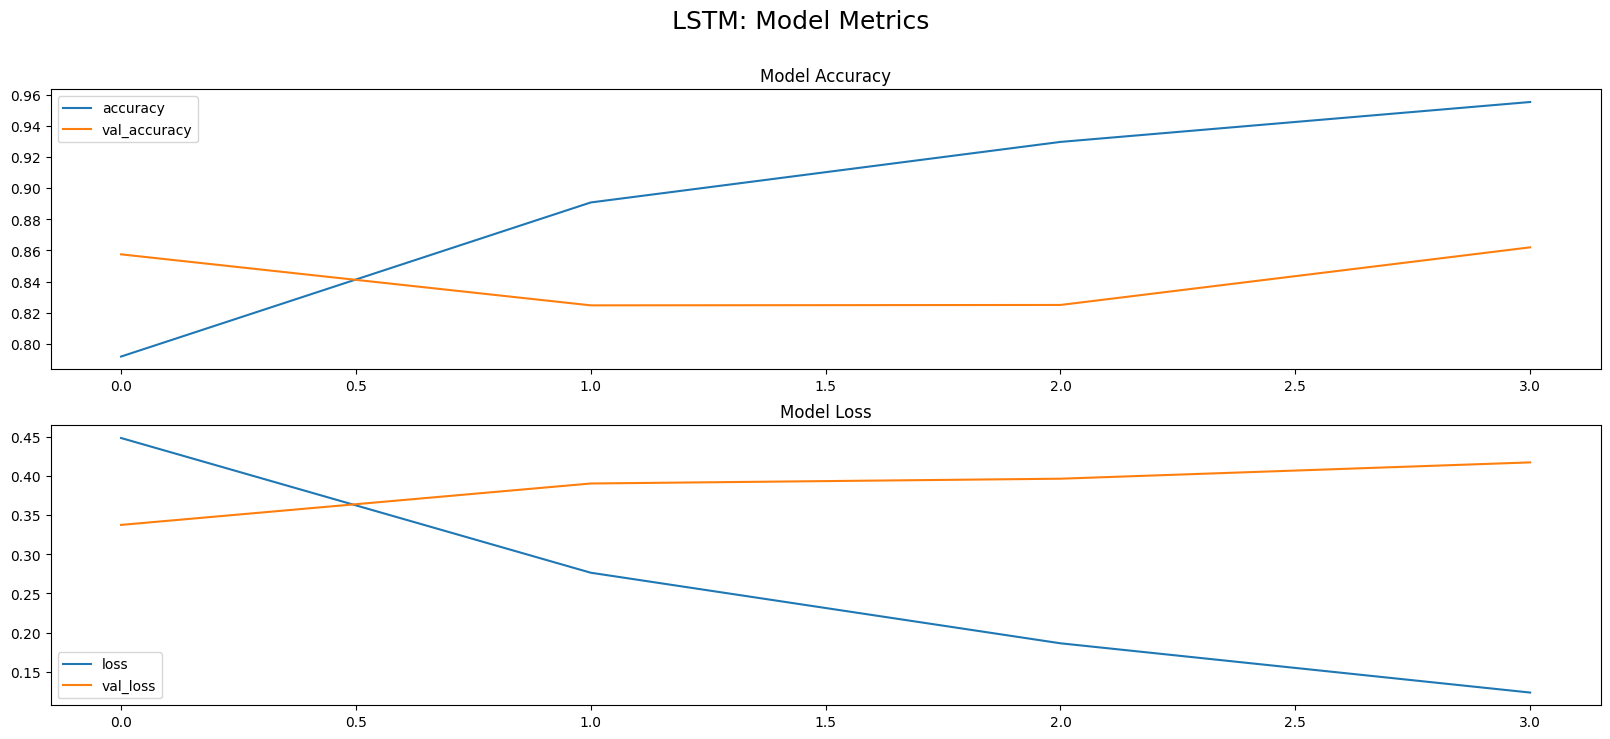

In [10]:
embedding_dim = 100  # Dimensionality of word embeddings
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))  # 2 output classes (binary classification)

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
#plot_model(model, show_shapes=True)

# Early Stopping Callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

epochs = 10
batch_size = 16
history = model.fit(X_train_pd, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

plot_model_learning(history, 'LSTM')

In [11]:
X_test_data = test_df['text']
X_test_seq = tokenizer.texts_to_sequences(X_test_data)
X_test_pd = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Make Predictions
predictions = model.predict(X_test_pd)

# Convert the model's predictions back to sentiment labels
predicted_sentiments = [le.classes_[np.argmax(prediction)] for prediction in predictions]

# Add the predicted sentiments to the test DataFrame
test_df['predicted_sentiment'] = predicted_sentiments

# Display or save the results
print(test_df[['text', 'predicted_sentiment']])

test_df.to_csv("predicted.csv")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
                                                    text predicted_sentiment
0      My daughter liked it but I was aghast, that a ...                 neg
1      I... No words. No words can describe this. I w...                 pos
2      this film is basically a poor take on the old ...                 neg
3      This is a terrible movie, and I'm not even sur...                 neg
4      First of all this movie is a piece of reality ...                 pos
...                                                  ...                 ...
24995  For one thing, he produced this movie. It has ...                 pos
24996  The title comes from an alteration an adolesce...                 pos
24997  Christopher Nolan's first film is a 'no budget...                 pos
24998  The story is shortly about the faith-lacking b...                 neg
24999  I found parts of this movie rather slow, espec...                 neg

[25000 rows x 2 columns]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have made predictions and added them to the 'test_df' DataFrame as 'predicted_sentiment'

# True labels from the test DataFrame
true_labels = test_df['sentiment']

# Predicted labels
predicted_labels = test_df['predicted_sentiment']

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8482
Precision: 0.8530
Recall: 0.8482
F1-score: 0.8477


In [13]:
list1 = [le.classes_[np.argmax(prediction)] for prediction in predictions]
list1[:10]

['neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg']